# Saving and loading Evolution

In this example, we will demonstrate how to save an evolutionary optimization on one machine or instance and load the results in another machine. This is useful, when the optimization is carried out on another computer as the analysis of the results are done. 

In [2]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-2] == "neurolib":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [ ]:
# prepare logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

%load_ext autoreload
%autoreload 2

We import the modules that we need for evolution

In [16]:
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution
import numpy as np

We will simply run the basic optimization on a circle from Example 2.

In [ ]:
def optimize_me(traj):
    ind = evolution.getIndividualFromTraj(traj)
    result = tuple([abs((ind.x**2 + ind.y**2) - 1)])
    return result, {"random_output" : np.random.randint(100)}

    
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, weightList = [-1.0],
                      POP_INIT_SIZE=10, POP_SIZE = 6, NGEN=4, filename="example-2.0.1.hdf")

evolution.run(verbose = True)

## Save evolution

Now that the optimization is done, we can serialize and save the evolution using the [dill](https://github.com/uqfoundation/dill) module.

In [23]:
EVOLUTION_DILL = "saved_evolution.dill"
evolution.saveEvolution(EVOLUTION_DILL)

MainProcess root INFO     Saving evolution to saved_evolution.dill


## Load evolution

Here, we pretend as if we're on a completely new machine. We need to instantiate the `Evolution` class in order to fill it with the data from the previous optimization. For this, we create a "mock" evolution with some fake parameters and then load the dill file to fill out the mock values with the real ones.

In [24]:
# initialize mock evolution for loading previously generated data
pars = ParameterSpace(['mock'], 
                      [[0, 1]])
evaluateSimulation = lambda x: x
evolution_new = Evolution(evaluateSimulation, 
                      pars)
evolution_new = evolution_new.loadEvolution(EVOLUTION_DILL)

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2021-02-15-12H-13M-39S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2021-02-15-12H-13M-39S
MainProcess root INFO     Number of cores: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created a

Now, we should be able to do everything we want with the new evolution object.

In [25]:
dfEvolution = evolution_new.dfEvolution()
dfEvolution

,x,y,score,id,gen,f0
0,1.767126,0.547244,-2.422212,1,0,2.422212
1,1.908967,-0.899728,-3.453668,7,0,3.453668
2,2.047736,1.437642,-5.260036,9,0,5.260036
3,-1.521826,2.259241,-6.420126,8,0,6.420126
4,-0.898959,2.578525,-6.456920,0,0,6.456920
5,2.622927,-1.558091,-8.307394,3,0,8.307394
6,0.517562,1.942211,-3.040056,10,1,3.040056
7,-1.820438,2.712097,-9.669464,11,1,9.669464
8,0.777049,1.272183,-1.222253,12,1,1.222253
9,3.143349,0.980240,-9.841516,13,1,9.841516


We can also be able to load the hdf file in which all simulated was stored ("random_output" in the evaluation function above).

In [30]:
evolution_new.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/example-2.0.1.hdf
MainProcess root INFO     Analyzing trajectory results-2021-02-15-12H-13M-24S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/example-2.0.1.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2021-02-15-12H-13M-24S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `derived_parameters` in mode `1`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


We can load the output from the hdf file by passing the argument `outputs=True` to the `dfEvolution()` method:

In [29]:
evolution_new.dfEvolution(outputs=True)

,x,y,score,id,gen,random_output,f0
0,1.767126,0.547244,-2.422212,1,0,1.0,2.422212
1,1.908967,-0.899728,-3.453668,7,0,1.0,3.453668
2,2.047736,1.437642,-5.260036,9,0,1.0,5.260036
3,-1.521826,2.259241,-6.420126,8,0,1.0,6.420126
4,-0.898959,2.578525,-6.456920,0,0,1.0,6.456920
5,2.622927,-1.558091,-8.307394,3,0,1.0,8.307394
6,0.517562,1.942211,-3.040056,10,1,51.0,3.040056
7,-1.820438,2.712097,-9.669464,11,1,51.0,9.669464
8,0.777049,1.272183,-1.222253,12,1,51.0,1.222253
9,3.143349,0.980240,-9.841516,13,1,51.0,9.841516


> Simulation parameters
HDF file storage: ./data/hdf/example-2.0.1.hdf
Trajectory Name: results-2021-02-15-12H-13M-24S
Duration of evaluating initial population 0:00:01.093011
Duration of evolution 0:00:08.117928
Eval function: <function optimize_me at 0x7fd124ee4840>
Parameter space: {'x': [-5.0, 5.0], 'y': [-5.0, 5.0]}
> Evolution parameters
Number of generations: 4
Initial population size: 10
Population size: 6
> Evolutionary operators
Mating operator: <function cxBlend at 0x7fd122dcdb70>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7fd122dfab70>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7fd122dfaae8>
Comments: no comments
--- Info summary ---
Valid: 6
Mean score (weighted fitness): -0.93
Parameter distribution (Generation 3):
x: 	 mean: 0.4360,	 std: 1.0159
y: 	 mean: 0.3560,	 std: 0.5401
--------------------
Best 5 individuals:
Printing 5 individuals
Individual 0
	Fitness values:  0.16
	Score:  -0.16
	Weighted f

/Users/caglar/anaconda/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


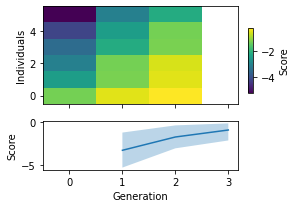

MainProcess root INFO     Saving plot to ./data/figures/results-2021-02-15-12H-13M-24S_hist_3.png


There are 6 valid individuals
Mean score across population: -0.93


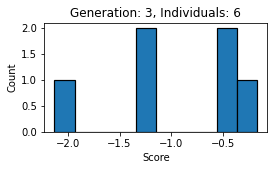

<Figure size 432x288 with 0 Axes>

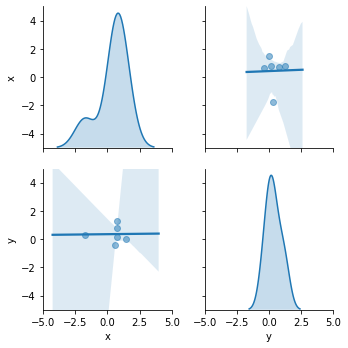

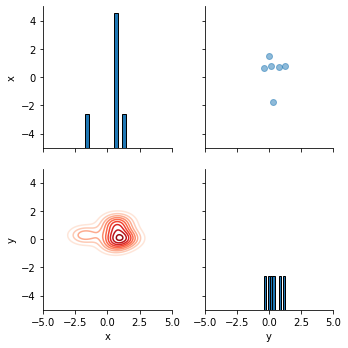

In [27]:
evolution.info()